#BK Channel Activation Gate#
The NML2 conversion of the Maex and De Schutter 1998 tau and inf activation gate variables appear to be shifted slightly to more negative Vm values: 

Populating the interactive namespace from numpy and matplotlib


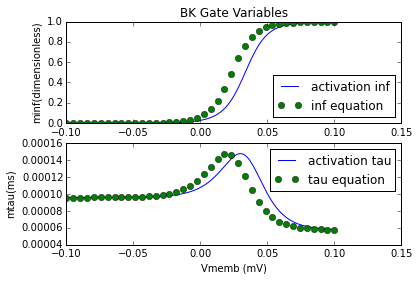

In [1]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('BK_IAMC_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('BK_IAMC_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('BK_IAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
q10 = 3**((35 - 17.350264793)/10)#6.95195
v = np.linspace(-0.100, 0.100, 40)
ca_conc = 5e-05#0.025
a = (2500/(1 + ( (1.5e-3 *(np.exp(-85*v))) / ca_conc)))
#(2500/(1 + ( (1.5e-3 *(exp (-85* m_forwardRate_V ))) /  m_forwardRate_ca_conc ))) #NML2 generated mod file extra brackets
#"2500/(1 + ( (1.5e-3 *(exp (-85*v))) / ca_conc))"
b = (1500/(1 + (ca_conc / (1.5e-4 * (np.exp (-77*v))))))
#(1500/(1 + ( m_reverseRate_ca_conc  / (1.5e-4 * (exp (-77* m_reverseRate_V )))))) #NML2 generated mod file extra brackets
#"1500/(1 + (ca_conc / (1.5e-4 * (exp (-77*v)))))"
mtaueq=1/( (a + b)*q10)
minf_fit = a/(a + b)

#SI units so do not convert to physiological units
#vm[1] = vm[1]*1000
#mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('BK Gate Variables')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper left')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

Not the answer, but this requires quite a change in parameters to fix:

Populating the interactive namespace from numpy and matplotlib


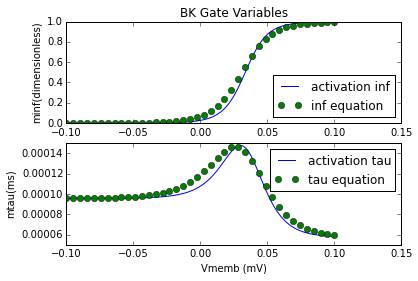

In [30]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('BK_IAMC_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('BK_IAMC_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('BK_IAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
q10 = 3**((35 - 17.350264793)/10)#6.95195
v = np.linspace(-0.100, 0.100, 40)
ca_conc = 5e-05#0.025
a = 2500/(1 + ( (1.5e-3 *(np.exp(-65*v))) / ca_conc))
#"2500/(1 + ( (1.5e-3 *(exp (-85*v))) / ca_conc))"
b = 1500/(1 + (ca_conc / (1.5e-4 * (np.exp (-58*v)))))
#"1500/(1 + (ca_conc / (1.5e-4 * (exp (-77*v)))))"
mtaueq=1/( (a + b)*q10)
minf_fit = a/(a + b)

#SI units so do not convert to physiological units
#vm[1] = vm[1]*1000
#mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('BK Gate Variables')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper left')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

I cannot see any differences between the equations in the BK mod file for orginal generatedNeuron in comparison with NML2 conversion mod file: 

**Extract from NML2 mod file**

m_forwardRate_r = (2500/(1 + ( (1.5e-3 *(exp (-85* m_forwardRate_V ))) /  m_forwardRate_ca_conc ))) /  m_forwardRate_TIME_SCALE ? evaluable

m_reverseRate_r = (1500/(1 + ( m_reverseRate_ca_conc  / (1.5e-4 * (exp (-77* m_reverseRate_V )))))) /  m_reverseRate_TIME_SCALE ? evaluable

m_q10Settings_q10 = m_q10Settings_q10Factor ^((temperature -  m_q10Settings_experimentalTemp )/ m_q10Settings_TENDEGREES ) ? evaluable

m_fcond = m_q ^ m_instances ? evaluable

m_inf = m_alpha /( m_alpha + m_beta ) ? evaluable

m_tau = 1/(( m_alpha + m_beta ) *  m_rateScale ) ? evaluable

**Extract from original generatedNeuron mod file**

alpha = 2500/(1 + ( (1.5e-3 *(exp (-85*v))) / ca_conc))

beta = 1500/(1 + (ca_conc / (1.5e-4 * (exp (-77*v)))))

mtau = 1/(temp_adj_m*(alpha + beta))

minf = alpha/(alpha + beta)